In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./data/Fish.csv")

In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


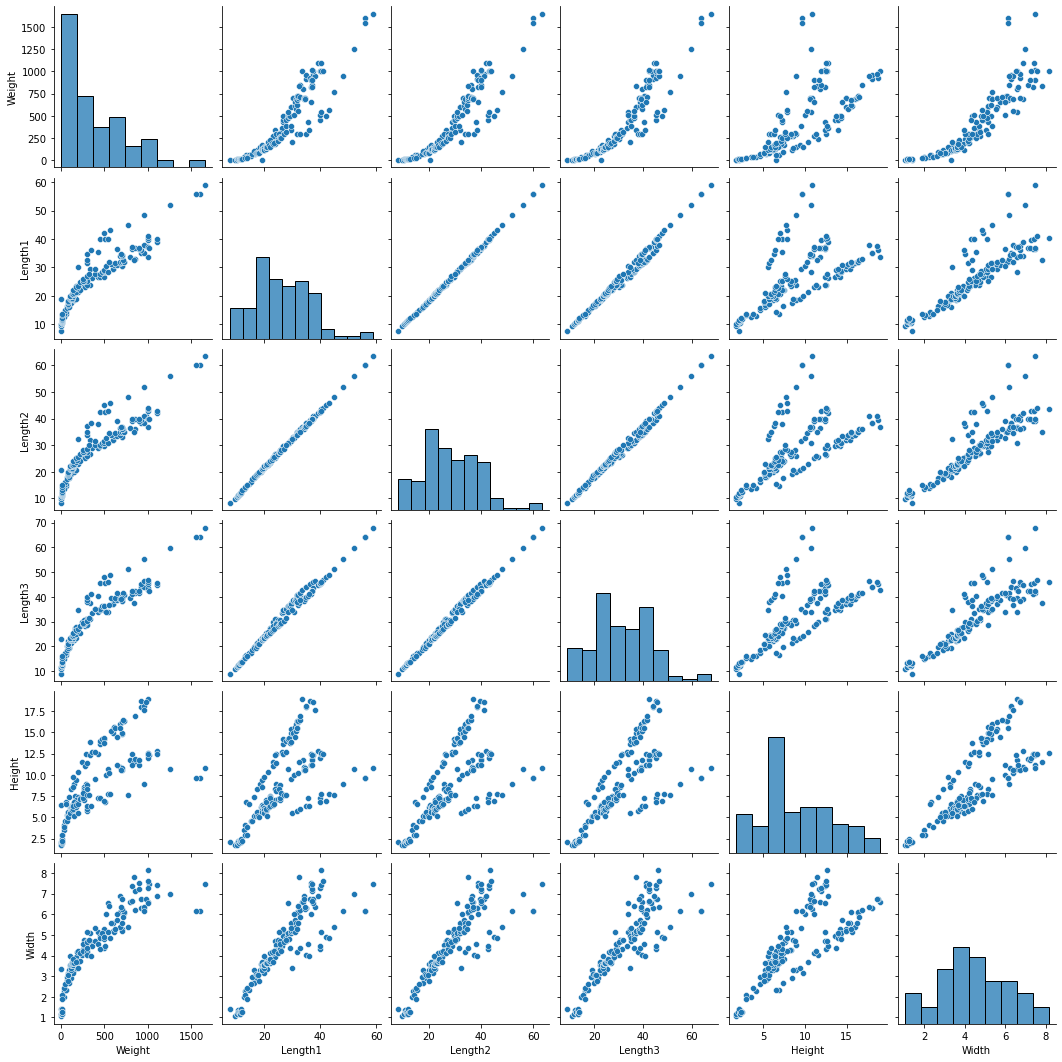

In [5]:
sns.pairplot(data)

In [6]:
import sklearn.preprocessing
data_val = data.values
scaler = sklearn.preprocessing.StandardScaler(with_mean=True, with_std=True)
data_val[:,1:] = scaler.fit_transform(data_val[:,1:])
data_scaled = pd.DataFrame(data_val)

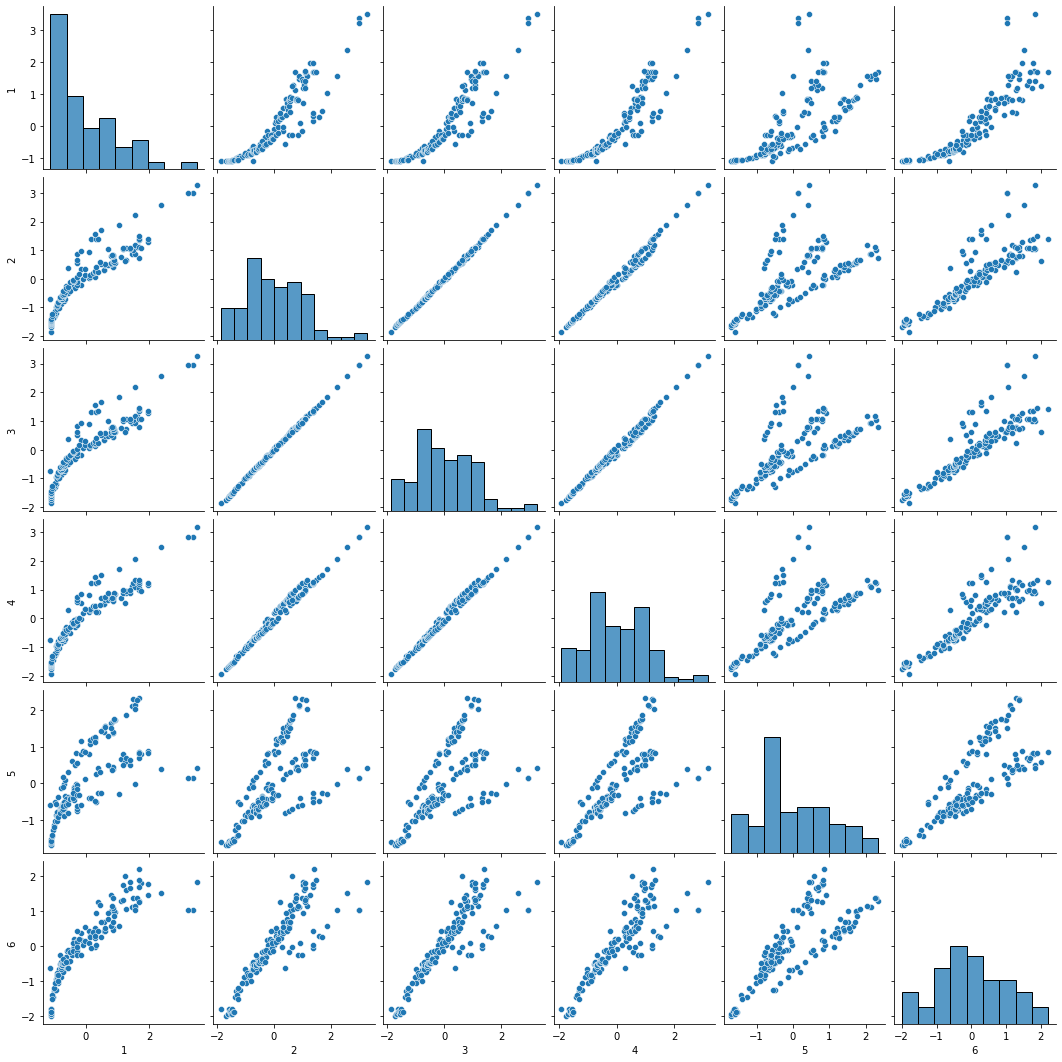

In [7]:
sns.pairplot(data_scaled)

In [8]:
data_scaled.columns = data.columns
data_scaled.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,-0.438072,-0.305789,-0.282303,-0.10602,0.596579,-0.236529
1,Bream,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,Bream,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,Bream,-0.098995,0.005302,0.054694,0.19639,0.879771,0.022621
4,Bream,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371


In [9]:
data_scaled_one_hot = pd.get_dummies(data_scaled.Species, prefix='Species')
data_scaled_one_hot.head()

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [10]:
import pickle as pkl
with open('./data/experiments.pkl', 'rb') as f:
    indices = pkl.load(f)

print(indices)
print(len(indices))
print(len(indices[0:int(0.8 * len(indices))]))
print(len(indices[int(0.8 * len(indices)):]))
# train/test split with first 80% indices as training sample
data = pd.read_csv("./data/Fish.csv")
data_val = data.values
data_val = data_val[:,1:]
data_val = pd.DataFrame(data_val)
data_val.columns = data.columns[1:]

onr_hot_val = data_scaled_one_hot.values

data_val.head()

[ 59  22 121 123 146   6  52 157  50   8  29  10 138 131  95  30 135  92
  38  44  75  65   5 104 120 122   1  49  11  19  12  26 133  62 100  60
  63  42  33   2 130 142   0  94  88 126  15 139  80 154 116 143 151  90
  96  18 125  66 111 145 115  89  99  83 144  55   7  31  69 149  14  24
 141  57  32  71  43  27  53  82  64  58  40 152  67 147  81 114  72 113
 150 137  46  70 155  74  37  41 136  78 129  86 148  87  45 156  39  23
 110 119  93 108 117  20 153  13 134 112 132  76 127  36 124  77  34  47
 106  91  21 102  73  79  16 101 128  17  51 140 109   3  85  97  28   4
  56  25  98 103  48 118 105 158 107  61  35   9  84  54  68]
159
127
32


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.52,4.02
1,290.0,24.0,26.3,31.2,12.48,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.73,4.4555
4,430.0,26.5,29.0,34.0,12.444,5.134


In [11]:
for label in data_val.columns:
    print(label)
    data_val[label] = (data_val[label] - np.mean(data_val[label]))/np.std(data_val[label])

train_x_1 = data_val.values[indices[0:int(0.8 * len(indices))]]
test_x_1 = data_val.values[indices[int(0.8 * len(indices)):]]

train_x_2 = onr_hot_val[indices[0:int(0.8 * len(indices))]]
test_x_2 = onr_hot_val[indices[int(0.8 * len(indices)):]]

print(train_x_1[26])
print(test_x_1[0])

Weight
Length1
Length2
Length3
Height
Width
[-0.3035621837350457 -0.22550724244021217 -0.1980536632680904
 -0.002336683729010334 0.821260549358779 -0.06657894566979292]
[-0.7519288111666704 -0.576738086039368 -0.5537731143578056
 -0.6244379704660891 -0.729044417471328 -0.4721739096152278]


In [12]:
train_x = np.zeros(shape=(train_x_1.shape[0], train_x_1.shape[1] + train_x_2.shape[1] - 1))
for i in range(train_x_1.shape[0]):
    train_x[i] = np.array(list(train_x_1[i][1:]) + list(train_x_2[i]))
test_x = np.zeros(shape=(test_x_1.shape[0], test_x_1.shape[1] + test_x_2.shape[1] - 1))
for i in range(test_x_1.shape[0]):
    test_x[i] = np.array(list(test_x_1[i][1:]) + list(test_x_2[i]))

train_y_ori = data_val.values[indices[0:int(0.8 * len(indices))]]
train_y = np.zeros(shape=(train_y_ori.shape[0],))
for i in range(train_y_ori.shape[0]):
    train_y[i] = train_y_ori[i][0]
test_y_ori = data_val.values[indices[int(0.8 * len(indices)):]]
test_y = np.zeros(shape=(test_y_ori.shape[0],))
for i in range(test_y_ori.shape[0]):
    test_y[i] = test_y_ori[i][0]

print(train_y[26])
print(train_x[26])
# -0.303562	-0.225507	-0.198054	-0.002337	0.821261	-0.066579
print(train_x_1[26])
print(train_x_2[26])
print([1, 2, 3] + [4, 5, 6], "-------------------------------------")
print(test_y[0])
print(test_x[0])
print(test_x_1[0])
print(test_x_2[0])

-0.3035621837350457
[-0.22550724 -0.19805366 -0.00233668  0.82126055 -0.06657895  1.
  0.          0.          0.          0.          0.          0.        ]
[-0.3035621837350457 -0.22550724244021217 -0.1980536632680904
 -0.002336683729010334 0.821260549358779 -0.06657894566979292]
[1 0 0 0 0 0 0]
[1, 2, 3, 4, 5, 6] -------------------------------------
-0.7519288111666704
[-0.57673809 -0.55377311 -0.62443797 -0.72904442 -0.47217391  0.
  0.          1.          0.          0.          0.          0.        ]
[-0.7519288111666704 -0.576738086039368 -0.5537731143578056
 -0.6244379704660891 -0.729044417471328 -0.4721739096152278]
[0 0 1 0 0 0 0]


In [13]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(127, 12)
(127,)
(32, 12)
(32,)


In [14]:
import numpy as np


class LinearReg(object):
    def __init__(self, indim=1, outdim=1):
        # initialize the parameters first. 
        print("__init__ ->", indim, outdim)
        self.indim = indim
        self.outdim = outdim
        self.W = None
        pass
    
    def fit(self, X, T):
        # implement the .fit() using the simple least-square closed-form solution:
        # W = (X^T X)^-1 X^T T
        X_NEW = np.ones(shape=(X.shape[0], X.shape[1] + 1))
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                # print(X_NEW[i][j], X[i][j], i, j)
                X_NEW[i][j] = X[i][j]
        
        self.W = np.dot(np.dot(np.linalg.pinv(np.dot(X_NEW.T, X_NEW)), X_NEW.T), T)
        print(X.shape, X.T.shape, T.shape, self.W.shape)

        # HINT: 
        #   extend the input features before fitting to it.
        #   compute the weight matrix of shape [indim+1, outdim]

    def predict(self, X):
        # implement the .predict() using the parameters learned by .fit()
        # pass
        X_NEW = np.ones(shape=(X.shape[0], X.shape[1] + 1))
        for i in range(len(X)):
            for j in range(X.shape[1]):
                X_NEW[i][j] = X[i][j]
        
        return np.dot(X_NEW, self.W)

In [15]:
import math
# create the model

lr_model = LinearReg(12, 1)

# fit the model

lr_model.fit(train_x, train_y)

# compute the loss on the training set

# MES
training_loss = 0
pred_y_t = lr_model.predict(train_x)
for i in range(len(pred_y_t)):
    training_loss += math.pow((train_y[i] - pred_y_t[i]), 2)
print("training_loss ->", training_loss/len(pred_y_t))

# compute the loss on the test set

testing_loss = 0
pred_y = lr_model.predict(test_x)
for i in range(len(pred_y)):
    testing_loss += math.pow((test_y[i] - pred_y[i]), 2)
print("testing_loss ->", testing_loss/len(pred_y))

__init__ -> 12 1
(127, 12) (12, 127) (127,) (13,)
training_loss -> 0.062336686604132545
testing_loss -> 0.07599127005369075


In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(type(train_x))
print(type(train_y))

def cal_mse_loss(T, Y):
    loss = 0
    for i in range(len(Y)):
        loss += math.pow((T[i] - Y[i]), 2)
    return loss/len(Y)

(127, 12)
(127,)
(32, 12)
(32,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# use the second-order polynomial basis functions
def second_order_basis_unit(X):
    RET = []
    for i in range(len(X)):
        for j in range(i, len(X)):
            RET.append(X[i] * X[j])
    RET = np.array(RET)
    # print("UNIT RET.shape ->", RET.shape)
    # print("UNIT RET ->", RET)
    return RET


def second_order_basis(X):
    # we will perform a simple implementation
    # using the broadcasting mechanism in numpy.
    # HINT:
    #   np.triu_indices(): returns the indices of the upper triangular matrix
    if X.shape[1] == 1:
        X_NEW = np.zeros(shape=(len(X), len(X)))
        # print("second_order_basis X,shape ->", X.shape)
        # print("second_order_basis X_NEW,shape ->", X_NEW.shape)
        RET = []
        for i in range(len(X)):
            # ROW = []
            for j in range(len(X)):
                X_NEW[i][j] = X[i][0] * X[j][0]
                if j >= i:
                    # ROW.append(X_NEW[i][j])
                    RET.append(X_NEW[i][j])
        # RET = np.array(RET)
        # print("second_order_basis RET,shape ->", len(RET))
        # RET = RET.reshape(1, len(RET))
        # print("second_order_basis RET,shape ->", RET.shape)
        # iu2 = np.triu_indices(len(X))
        iu2 = (np.array([i for i in range(len(X))]), np.array([i for i in range(len(X))]))
        XX = np.dot(X, X.T)
        print(X)
        # print("second_order_basis XX,shape ->", XX.shape)
        print(XX)
        print(iu2)
        print(XX[iu2])
        RET = XX[iu2].reshape(len(XX[iu2]), 1)
        # print(RET, end="\n=============================\n")
        # return XX[iu2]
        return RET
    else:
        return np.array([second_order_basis_unit(x) for x in X])

In [18]:
# create the model

train_x_p = second_order_basis(train_x)
test_x_p = second_order_basis(test_x)

lr_model = LinearReg(len(train_x_p[0]), 1)

# fit the model

lr_model.fit(train_x_p, train_y)

# compute the loss on the training set

# MES
training_loss = 0
pred_y_t = lr_model.predict(train_x_p)
for i in range(len(pred_y_t)):
    training_loss += math.pow((train_y[i] - pred_y_t[i]), 2)
print("training_loss ->", training_loss/len(pred_y_t))

# compute the loss on the test set

testing_loss = 0
pred_y = lr_model.predict(test_x_p)
for i in range(len(pred_y)):
    testing_loss += math.pow((test_y[i] - pred_y[i]), 2)
print("testing_loss ->", testing_loss/len(pred_y))

__init__ -> 78 1
(127, 78) (78, 127) (127,) (79,)
training_loss -> 0.007369456930476487
testing_loss -> 0.037737000212629865


In [19]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, LassoLarsIC, LassoLarsCV, LassoLars
from sklearn.pipeline import make_pipeline
import sklearn.preprocessing

def try_models(lr, train_x, train_y, test_x, test_y):

    lr.fit(train_x, train_y)
    pred_y = lr.predict(test_x)

    return cal_mse_loss(test_y, pred_y)

# Ordinary least squares Linear Regression.
print("LinearRegression ->", try_models(LinearRegression(), train_x, train_y, test_x, test_y))
# Linear least squares with l2 regularization.
print("Ridge ->", try_models(Ridge(), train_x, train_y, test_x, test_y))
# Ridge regression with built-in cross-validation.
print("RidgeCV ->", try_models(RidgeCV(cv=50), train_x, train_y, test_x, test_y))
# Linear model fitted by minimizing a regularized empirical loss with SGD.
print("SGDRegressor ->", try_models(SGDRegressor(), train_x, train_y, test_x, test_y))
# Linear regression with combined L1 and L2 priors as regularizer.
print("ElasticNet ->", try_models(ElasticNet(max_iter=1000000, tol=1e-8), train_x, train_y, test_x, test_y))
# Elastic Net model with iterative fitting along a regularization path.
print("ElasticNetCV ->", try_models(ElasticNetCV(max_iter=1000000, tol=1e-8, cv=5), train_x, train_y, test_x, test_y))

LinearRegression -> 0.07599127005376088
Ridge -> 0.06674792314167677
RidgeCV -> 0.05940370767567821
SGDRegressor -> 0.06302539156225424
ElasticNet -> 0.23724292194861554
ElasticNetCV -> 0.07011677675984508


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

print("DecisionTreeRegressor ->", try_models(DecisionTreeRegressor(max_depth=500000), train_x, train_y, test_x, test_y))
print("GradientBoostingRegressor ->", try_models(GradientBoostingRegressor(random_state=1), train_x, train_y, test_x, test_y))
print("KNeighborsRegressor ->", try_models(KNeighborsRegressor(n_neighbors=10, metric='euclidean'), train_x, train_y, test_x, test_y))
print("RandomForestRegressor ->", try_models(RandomForestRegressor(n_estimators=100, random_state=1), train_x, train_y, test_x, test_y))
print("SVR ->", try_models(SVR(degree=30), train_x, train_y, test_x, test_y))


DecisionTreeRegressor -> 0.05394686400955856
GradientBoostingRegressor -> 0.028634178077987002
KNeighborsRegressor -> 0.034789994040148244
RandomForestRegressor -> 0.039039627706007454
SVR -> 0.01591315961297594


In [21]:
class BostonDataset(torch.utils.data.Dataset):
    '''
    Prepare the Boston dataset for regression
    '''

    def __init__(self, X, y, scale_data=True):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            # Apply scaling if necessary
            if scale_data:
                X = StandardScaler().fit_transform(X)

            self.X = torch.from_numpy(X)
            self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [22]:
class MLP(nn.Module):
    '''
    Multilayer Perceptron for regression.
    '''
    
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )


    def forward(self, x):
        '''
          Forward pass
        '''
        return self.layers(x)

In [23]:
torch.manual_seed(42)

In [24]:
X, y = train_x, train_y

In [25]:
dataset = BostonDataset(X, y, scale_data=False)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=True, num_workers=0)

In [26]:
mlp = MLP()
l1loss_function = nn.L1Loss()
mseloss_function = nn.MSELoss()
adam_optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-5)
sgd_optimizer = torch.optim.SGD(mlp.parameters(), lr=1e-5, momentum=0.7)

In [27]:
# len(trainloader)
# from sklearn.datasets import load_boston
# X, y = load_boston(return_X_y=True)
# print(X[0])
# print(y[0])
# print(type(X))
# print(type(y))
# print(X.shape)
# print(y.shape)
print(mlp)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [28]:
def train_model(loss_function, optimizer, save_path, mlp=mlp, epoch_num=150):

    # Run the training loop
    for epoch in range(epoch_num): # 5 epochs at maximum

        # Set current loss value
        current_loss = 0.0

        # Iterate over the DataLoader for training data
        for i, data in enumerate(trainloader):

            # Get and prepare inputs
            inputs, targets = data
            inputs, targets = inputs.float(), targets.float()
            targets = targets.reshape((targets.shape[0], 1))

            # Zero the gradients
            optimizer.zero_grad()

            # Perform forward pass
            outputs = mlp(inputs)

            # Compute loss
            loss = loss_function(outputs, targets)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # Print statistics
            current_loss += loss.item()
        if epoch % 50 == 0:
            print("Epoch ->", epoch + 1, "\t\t===============\t\tLoss ->", current_loss/len(trainloader))
        current_loss = 0.0

    # Process is complete.
    print('Training process has finished.')
    torch.save(mlp.state_dict(), save_path)
    return mlp

In [29]:
def eval_model(model):
    dataset = BostonDataset(test_x, test_y, scale_data=False)
    # batch_size=len(dataset) !!! only one set !!!
    testloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False, num_workers=0)
    for i, data in enumerate(testloader):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        outputs = model(inputs)
    testing_loss = 0
    for i in range(len(outputs)):
        testing_loss += math.pow((test_y[i] - outputs[i]), 2)
    print("testing_loss ->", testing_loss/len(outputs))

In [30]:
l1_adam = train_model(l1loss_function, adam_optimizer, save_path="./model/l1_adam.pt", mlp=mlp, epoch_num=500)

Epoch -> 1 		===============		Loss -> 0.8487805242721851
Epoch -> 51 		===============		Loss -> 0.6660615119796532
Epoch -> 101 		===============		Loss -> 0.4284418294062981
Epoch -> 151 		===============		Loss -> 0.30834166877544844
Epoch -> 201 		===============		Loss -> 0.22874890239192888
Epoch -> 251 		===============		Loss -> 0.1643605429965716
Epoch -> 301 		===============		Loss -> 0.12432069832888934
Epoch -> 351 		===============		Loss -> 0.10917989125188726
Epoch -> 401 		===============		Loss -> 0.10529061507147092
Epoch -> 451 		===============		Loss -> 0.10151920238366494
Training process has finished.


In [31]:
eval_model(l1_adam)

testing_loss -> 0.011546974779458131
